# Project: 'No Show Appointment' data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project I will be doing an analysis on the "No show appoinment dataset". Data  was collected  on the question
of whether or not patients show up for their medical appointment they booked in a hospital in Brazil. The dataset contains information of 100,000 medical appointments from patients with different attribute of disease.
>
> **These questions will be analysed;**
> 1. **What is the relation between the age and the no-show column?**
> 2. **What is the distribution of patients between scholarship and disease?**
> 3. **What is the Gender distribution of the Scholarship among the patients?.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> In this section of the project, I will load in the data, check for cleanliness(duplicates, missing data, fixing data types), and then trim and clean your dataset for analysis. 

In [2]:
# load the data set and display few roles to know the columns and kind of data I am dealing with
df_nsa = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df_nsa)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

In [3]:
df_nsa.drop(['ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Handcap'], axis=1, inplace=True)

In [4]:
df_nsa.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,62,0,1,0,0,0,No
1,5.589978e+14,5642503,M,56,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,0,1,1,0,0,No


In [5]:
# Show the number of rows and columns in the dataset
df_nsa.shape

(110527, 10)

In [6]:
# display the number of data missing and the various types of data for each colunm
df_nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientId      110527 non-null  float64
 1   AppointmentID  110527 non-null  int64  
 2   Gender         110527 non-null  object 
 3   Age            110527 non-null  int64  
 4   Scholarship    110527 non-null  int64  
 5   Hipertension   110527 non-null  int64  
 6   Diabetes       110527 non-null  int64  
 7   Alcoholism     110527 non-null  int64  
 8   SMS_received   110527 non-null  int64  
 9   No-show        110527 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 8.4+ MB


In [7]:
# check for summary statistic of the data
df_nsa.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# display the unique age values of the patients
df_nsa.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [9]:
# there is an outlier in the age column which is (-1)
df_nsa[df_nsa['Age'] == -1]

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
99832,4.659432e+14,5775010,F,-1,0,0,0,0,0,No


In [10]:
#Index of the outlier
df_nsa[df_nsa['Age'] == -1].head(1).index.tolist()

[99832]

In [11]:
# Drop the column with the outlier
df_nsa.drop([99832], axis = 0, inplace=True)

In [12]:
#checking if the outlier row has been dropped
df_nsa[df_nsa['Age'] == -1]

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show


In [13]:
# To check for data that appear more than ones for each patient
df_nsa.duplicated().sum()

0

In [14]:
# To check for the number of uniques attributes in each column
df_nsa.nunique()

PatientId         62298
AppointmentID    110526
Gender                2
Age                 103
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
SMS_received          2
No-show               2
dtype: int64

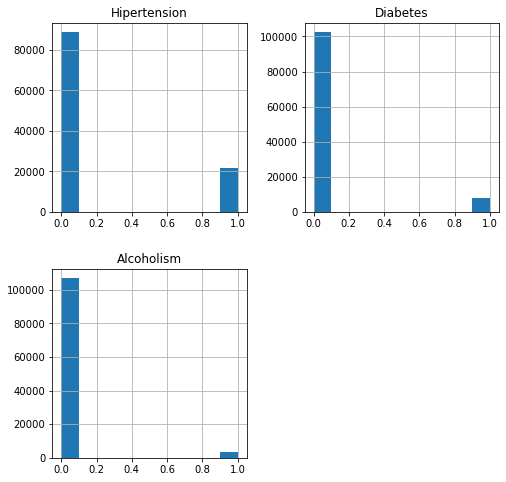

In [15]:
# visualise the various disease of the patients

df_nsa.hist(['Hipertension','Diabetes','Alcoholism'],figsize = (8,8));

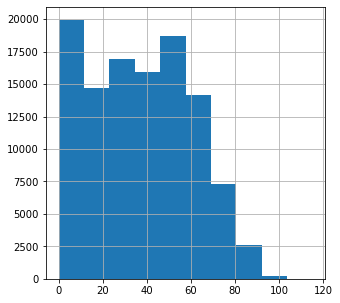

In [20]:
# visualise the age group of the patients
def Histogram(arg):
    df_nsa[arg].hist(figsize = (5,5))
    
Histogram('Age')

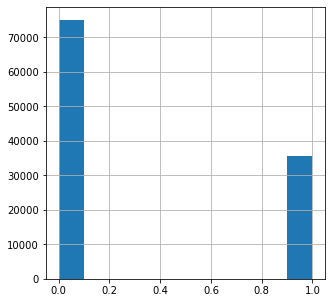

In [19]:
#visualise the SMS_recieved column
def Histogram(arg):
    df_nsa[arg].hist(figsize = (5,5))
    
Histogram('SMS_received')

For the SMS_recieved, '0' means that the patient did not receive any sms, whiles the '1' means that the patient received an sms



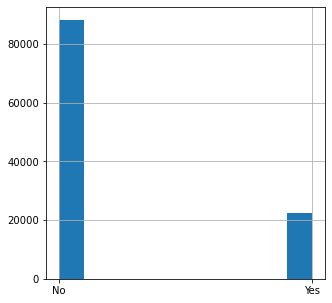

In [21]:
def Histogram(arg):
    df_nsa[arg].hist(figsize = (5,5))
    
Histogram('No-show')

**The 'No' in the 'no-show' column means that the patient showed up for the appoinment and the 'Yes' means that the patient did not show up for the appointment**

The graph shows that most of the patients showed up for the appointment.

In [22]:
#showing the number of patients that showed up
show = df_nsa[df_nsa['No-show'] == 'Yes']
show

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
6,7.336882e+14,5630279,F,23,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,39,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,29,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,40,1,0,0,0,0,Yes
20,6.222575e+14,5626083,F,30,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,45,0,0,0,0,0,Yes
110492,6.456342e+14,5786741,M,33,0,1,0,0,0,Yes
110496,8.544295e+13,5779046,F,37,0,1,0,0,0,Yes
110515,6.456342e+14,5778621,M,33,0,1,0,0,0,Yes


In [23]:
#showing the number of patients that did not show up
no_show = df_nsa[df_nsa['No-show'] == 'No']
no_show.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,62,0,1,0,0,0,No
1,5.589978e+14,5642503,M,56,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,0,1,1,0,0,No


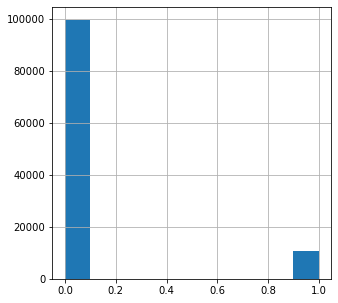

In [24]:
# Visualising the scholarsip column
def Histogram(arg):
    df_nsa[arg].hist(figsize = (5,5))
    
Histogram('Scholarship')

With the scholarship column, '0' means the patients don't have a scholarship, and '1' means the patients are on scholarship

# <a id='eda'></a>
# Exploratory Data Analysis


## Question 1
### What is the relation between the " **Age** " and the " No-column " column?

In [25]:
df_nsa.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,62,0,1,0,0,0,No
1,5.589978e+14,5642503,M,56,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,0,1,1,0,0,No


In [26]:
# show the mean age as grouped by showing up and not showing up for an appointment
df_nsa.groupby('No-show').Age.mean()

No-show
No     37.790504
Yes    34.317667
Name: Age, dtype: float64

In [27]:
# assigning the patients who showed up and those who did not show up to the appointment
showed = df_nsa['No-show'] == 'Yes'
noshow = df_nsa['No-show'] == 'No'



In [28]:
df_nsa.Age[showed].count()

22319

In [29]:
df_nsa.Age[noshow].count()

88207

In [30]:
df_nsa.Age[showed].mean()

34.31766656212196

In [31]:
df_nsa.Age[noshow].mean()

37.790504154999034

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style

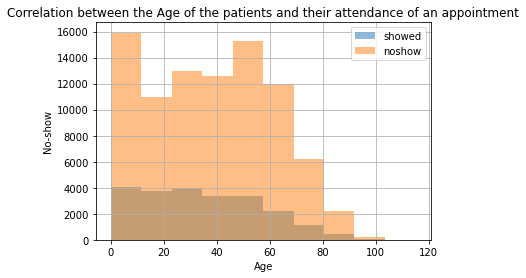

In [33]:
df_nsa.Age[showed].hist(alpha=0.5, bins=10, label='showed')
df_nsa.Age[noshow].hist(alpha=0.5,bins=10, label='noshow')
plt.title('Correlation between the Age of the patients and their attendance of an appointment')
plt.xlabel('Age')
plt.ylabel('No-show')
plt.legend();

"noshow" means that the patients showed up for the appointmnet
"showed" means that the patients did not show up for the appointment

**From the bar graph above, we can conclude that most of the older patients come for an appointment when they book it, whiles those who are comparably younger, missed most of the appointment**

## Question 2
###  What is the Gender distribution of the Scholarship among the patients


In [46]:
#display the dataset
df_nsa.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,62,0,1,0,0,0,No
1,5.589978e+14,5642503,M,56,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,0,1,1,0,0,No


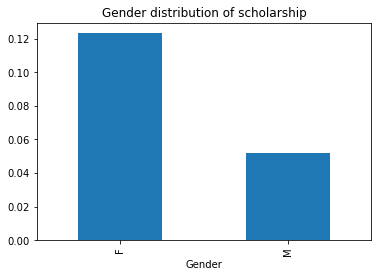

In [54]:
# Showing the Gender distribution of the Scholarship among the patients
df_nsa.groupby('Gender').Scholarship.mean().plot(kind = 'bar', title = 'Gender distribution of scholarship');

**From the graph above, we can conclude that the number of females on the scholarship more than the number of males on the schorlaship.**

# Question 3

## **What is the distribution of patients between scholarship and disease?**


In [137]:
# assign patients who have disease to new variable
h_yes = df_nsa['Hipertension'] == True
d_yes = df_nsa['Diabetes'] == True
a_yes = df_nsa['Alcoholism'] == True

In [138]:
s_yes = df_nsa['Scholarship'] == True

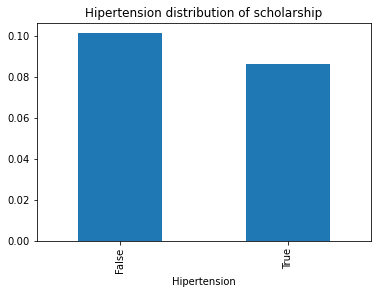

In [146]:
# distribution of patients with hipertension and their scholarship status
df_nsa.groupby([h_yes]).Scholarship.mean().plot(kind = 'bar', title = 'Hipertension distribution of scholarship');

**From the graph, we can see that most of the patients who do not have Hipertension are on the scholarship program.**

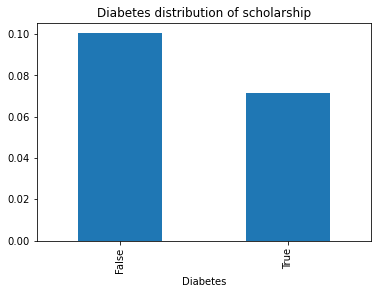

In [147]:
# distribution of patients with Diabetes and their scholarship status

df_nsa.groupby([d_yes]).Scholarship.mean().plot(kind = 'bar', title = 'Diabetes distribution of scholarship');

**With the information from the graph, we can see that most of the patients who do not have Diabetes are on the scholarship program.**

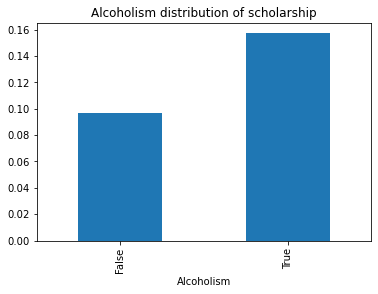

In [148]:
# distribution of patients with Alcoholism and their scholarship status

df_nsa.groupby([a_yes]).Scholarship.mean().plot(kind = 'bar', title = 'Alcoholism distribution of scholarship');

**From the graph above, we can conclude that, most of the patients who are alcoholic are on the scholarship program.**

## Limitations

some of the codes were giving me hard time with errors, but I don't think of it as a learning process